# 单一神经元网络：逐步实现

在这个任务中，您将使用numpy实现具有单个神经元的网络，完成本任务后，您将能够：

- 建立神经网络结构的单一神经元模型，实现在双月数据集上的分类任务
- 构建学习算法的总体结构，包括参数初始化、损失函数和梯度计算，以及优化实现（梯度下降）
- 使用 Numpy 函数和 Numpy 矩阵/矢量运算，实施计算效率高、高度矢量化的模型版本
- 利用反向传播思维，计算神经网络参数的导数
- 使用 Jupyter Notebook 进行交互式编程，并展示代码实现过程

您应该熟悉`numpy`。让我们开始吧！

让我们首先导入在此任务中所需的所有包。

如果您已安装 Anaconda 或者 Miniconda，则可以通过conda命令安装所需的包:

```shell
conda install numpy matplotlib scikit-learn 
```

如果您使用的是 pip，则可以通过以下命令安装所需的包:

```shell
pip install numpy matplotlib scikit-learn       
```

如果您使用的是其他的包管理工具，请参考相应的文档进行安装。

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import load_moon_dataset, plot_decision_boundary

%matplotlib inline 
np.random.seed(2024) 

加载双月数据集，其中参数 d 为 Y 轴的偏置量。这是一个维数为二的二分类问题。
- 当 d 的值越大两个月亮会更加分离
- 当 d 的值越小两个月亮会更加靠近
- 当 d 等于 0 时，两个月亮在一条线上
- 当 d 小于 0 时，两个月亮线性不可分

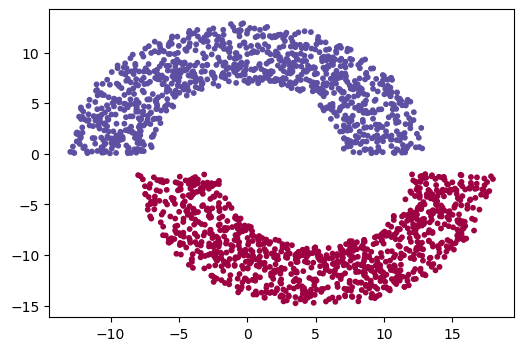

In [55]:
train_dataset = load_moon_dataset(N=1000, d=2)
test_dataset = load_moon_dataset(N=2000, d=2)
plt.figure(figsize=(6,4))
plt.scatter(train_dataset[:,0], train_dataset[:,1], c=train_dataset[:,2], s=10, cmap=plt.cm.Spectral)

为什么要利用numpy的矩阵运算实现矢量化？

numpy 用电脑内存中连续的一块物理地址存储数据，而python 的 list 分散在不同的物理空间。因此，只要是处理大规模数据的批量计算，numpy 比 python 的原生 list 要快，即使用 map 来代替 python 的原生循环赋值，numpy 还是更快。

执行以下代码观察 numpy 矩阵运算的速度：

In [56]:
import time
l = list(range(1000))

t0 = time.time()
for _ in range(10000):
    for i in range(len(l)):
        l[i] += 1

t1 = time.time()
for _ in range(10000):
    l = list(map(lambda i: i+1, l))

t2 = time.time()
a = np.array(l)
for _ in range(10000):
    a += 1

print("Python list spend {:.3f}s".format(t1-t0))
print("Python list with map spend {:.3f}s".format(t2-t1))
print("Numpy array spend {:.3f}s".format(time.time()-t2))

Python list spend 0.961s
Python list with map spend 0.619s
Numpy array spend 0.013s


让我们先来复习一下numpy中的乘法运算

In [57]:
a = np.arange(6).reshape((2,3))
b = np.arange(6,12).reshape((2,3))
print("a \n", a)
print("b \n", b)
print("a * b \n", a * b)
print("np.multiply(a, b) \n", np.multiply(a, b))
print("np.dot(a, b.T) \n", np.dot(a, b.T))
# print("np.dot(a, b) \n", np.dot(a, b))

a 
 [[0 1 2]
 [3 4 5]]
b 
 [[ 6  7  8]
 [ 9 10 11]]
a * b 
 [[ 0  7 16]
 [27 40 55]]
np.multiply(a, b) 
 [[ 0  7 16]
 [27 40 55]]
np.dot(a, b.T) 
 [[ 23  32]
 [ 86 122]]


总结
- a*b 或 np.multiply(a,b)表示对应位置相乘
- np.dot(A,B)表示矩阵乘法

以下，您将使用numpy实现具有单个神经元的网络，每个函数都有详细的说明来引导您完成。

In [58]:
class Neuron:
    def __init__(self, dim): 
        """
        将w初始化为一个维度为(dim, 1)的0向量, 并将b初始化为0
        """
        ####################################
        # Your Code Here

        self.weights = np.ones((dim, 1))
        self.bias =  0
        ####################################

        self.activate_func = np.sign
        self.loss_func = self.zero_one_loss

        assert(self.weights.shape == (dim, 1))
        assert(isinstance(self.bias, float) or isinstance(self.bias, int)) 

    def propagate(self, x):
        """
        实现前向传播
        y_i = activate_func(w_i * x_i + b)
        思考如何利用numpy的矩阵运算实现矢量化, 在矩阵乘法时注意矩阵维度的对齐
        """
        ####################################
        # Your Code Here
        y_pred = self.activate_func(np.dot(x, self.weights) + self.bias)
        ####################################
        
        assert(y_pred.shape == (x.shape[0], 1))
        
        return y_pred
    
    def zero_one_loss(self, y, y_pred):
        """
        0-1 损失
        """
        loss = np.sum(y != y_pred) / y.shape[0]
        return loss
    
    def mean_squared_error(self, y, y_pred):
        """
        均方损失
        """
        loss = np.mean(np.square(y - y_pred))
        return loss
    
    def backward(self, x, y, y_pred, learning_rate): 
        """
        实现后向传播, 通过运行梯度下降算法来优化w和b
        w = w + lr * xi.T * (yi - yi_hat)
        b = b + lr * (yi - yi_hat)
        思考如何利用numpy的矩阵运算实现矢量化, 在矩阵乘法时注意矩阵维度的对齐
        """

        m = x.shape[0]
        ####################################
        # Your Code Here
        self.weights = self.weights + (learning_rate * np.dot(x.T, (y - y_pred)))/m
        self.bias = self.bias + learning_rate * np.sum(y - y_pred)/m
        #for i in range(m):
        #    self.weights = self.weights + (learning_rate * x[i].T * np.sum(y[i] - y_pred[i])).reshape((2, 1))
        #    self.bias = self.bias + learning_rate * np.sum(y[i] - y_pred[i])
        #################################### 

        assert(self.weights.shape == (x.shape[1], 1))
        assert(isinstance(self.bias, float) or isinstance(self.bias, int)) 

    def train(self, x, y, epochs, learning_rate, is_plot=True):
        """
        模型训练
        """
        losses = []
        for epoch in range(epochs):
            ####################################
            # Your Code Here

            y_pred = self.propagate(x)
            self.backward(x, y, y_pred, learning_rate)
            ####################################
            
            loss = self.loss_func(y, y_pred)
            losses.append(loss)
            print("Epoch: {}, Loss: {}".format(epoch, loss))

        if is_plot:
            plt.figure(figsize=(6,4))
            plt.plot(losses)
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.title("Learning rate = " + str(learning_rate))
            plt.show()
        
        return self.weights, self.bias
    
    def predict(self, x, weights, bias):
        """
        通过学习得到的参数w和b进行预测
        """
        ####################################
        # Your Code Here
        
        y_pred = self.activate_func(np.dot(x, weights) + bias)
        ####################################
        
        assert(y_pred.shape == (x.shape[0], 1))
        return y_pred
    
    def evaluate(self, y, y_pred):
        return np.mean(y == y_pred)


调用上面实现的功能来构建模型并进行训练。

运行下面的代码，将输出训练过程中的损失值，损失曲线，训练准确率以及决策边界。

Epoch: 0, Loss: 0.275
Epoch: 1, Loss: 0.087
Epoch: 2, Loss: 0.023
Epoch: 3, Loss: 0.0165
Epoch: 4, Loss: 0.0125
Epoch: 5, Loss: 0.01
Epoch: 6, Loss: 0.0065
Epoch: 7, Loss: 0.0025
Epoch: 8, Loss: 0.0015
Epoch: 9, Loss: 0.0
Epoch: 10, Loss: 0.0
Epoch: 11, Loss: 0.0
Epoch: 12, Loss: 0.0
Epoch: 13, Loss: 0.0
Epoch: 14, Loss: 0.0
Epoch: 15, Loss: 0.0
Epoch: 16, Loss: 0.0
Epoch: 17, Loss: 0.0
Epoch: 18, Loss: 0.0
Epoch: 19, Loss: 0.0


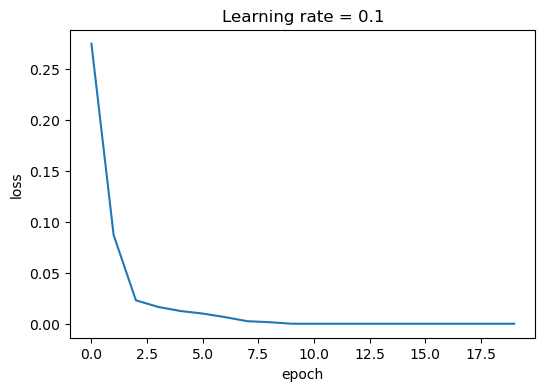

Accuracy of Training Dataset: 100.0 %


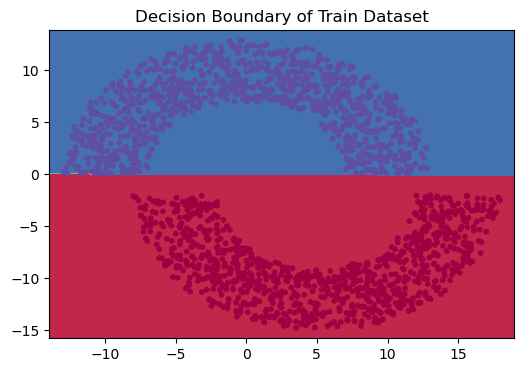

In [59]:
x_train = train_dataset[:,:2]
y_train = train_dataset[:,2].reshape(-1,1)
assert y_train.shape == (x_train.shape[0], 1) 


network = Neuron(x_train.shape[1])
weights, bias = network.train(x_train, y_train, epochs=20, learning_rate=0.1)
y_train_pred = network.predict(x_train, weights, bias)
print("Accuracy of Training Dataset:", format(network.evaluate(y_train, y_train_pred) * 100), "%")

plot_decision_boundary(lambda x: network.predict(x, weights, bias), x_train, y_train, dataset='Train')

将训练好的模型在测试集上进行预测，输出测试准确率和决策边界。

Accuracy of Test Dataset: 99.97500000000001 %


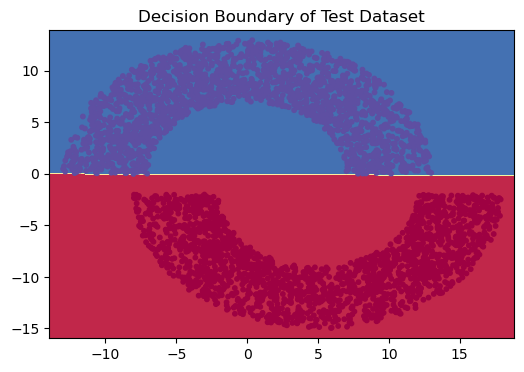

In [60]:
x_test = test_dataset[:,:2]
y_test = test_dataset[:,2].reshape(-1,1)
assert y_train.shape == (x_train.shape[0], 1) 

y_test_pred = network.predict(x_test, weights, bias)
print("Accuracy of Test Dataset:", format(network.evaluate(y_test, y_test_pred) * 100),  "%")
plot_decision_boundary(lambda x: network.predict(x, weights, bias), x_test, y_test, dataset='Test')

您已经完成了这个任务! 

一些额外的任务包括：

- 设置双月数据集的参数d=4, 0, -4，并运行模型，分别观察模型的表现。
- 将loss_func改为mean_squared_error，并运行模型，观察模型的表现。
- 将模型运行的epochs增加到100，观察模型的表现。
- 将模型运行的learning_rate设置为1, 0.1, 0.01，分别观察模型的表现。